In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# From https://plotly.com/python/line-charts/

df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df, x="year", y="lifeExp", color='country')
fig.show()

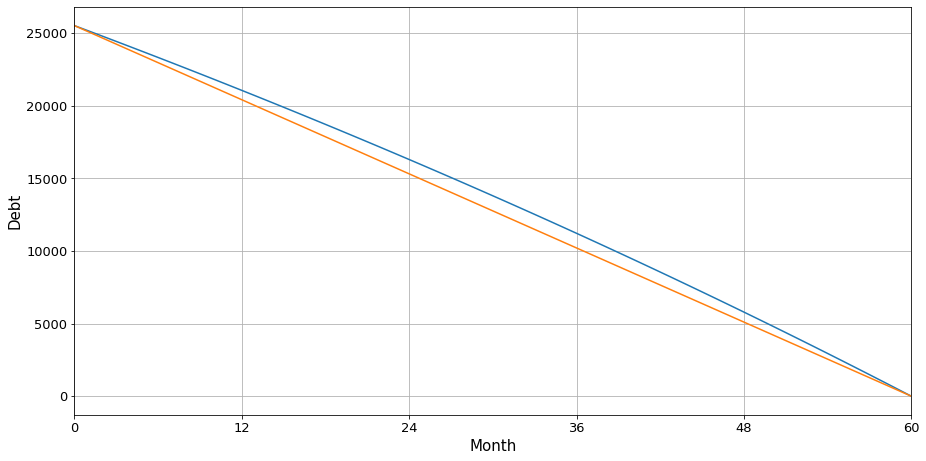

In [133]:
b = 25529.60 # 24800
a = 500.11
r = 0.0655/12
n = 60

def get_current_debt(debt,repay_rate,interest_rate,nmonths):

    def repayment(debt,repay_rate,interest_rate):

        b = debt
        r = interest_rate
        a = repay_rate

        return debt*(1+r) - a

    for month in range(nmonths):
        debt = repayment(debt,repay_rate,interest_rate)

    return debt

def get_current_debt_analytical(initial_debt,repay_rate,interest_rate,nmonths):
    
    b = initial_debt
    a = repay_rate
    r = interest_rate
    n = nmonths

    return b*(1+r)**n - a/r*((1+r)**n - 1)



months = np.arange(nmonths+1)
debt_loan = np.array([get_current_debt(b,a,r,n) for n in months])
debt_linear = np.cumsum([0]+[b/months[-1]]*(n))[::-1]


fs_label,fs_tick = 15,13
xlabel,ylabel = "Month","Debt"
fig,axs = plt.subplots(figsize=(15,7.5))
axs.plot(months,debt_loan)
axs.plot(months,debt_linear)

axs.tick_params(labelsize=fs_tick)
axs.set_xlabel(xlabel,fontsize=fs_label)
axs.set_ylabel(ylabel,fontsize=fs_label)
axs.grid()
axs.set_xlim([0,months[-1]])
axs.set_xticks(np.arange(0,months[-1]+12,12))

In [138]:
debt_linear[:-1] - debt_linear[1:]

array([425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333,
       425.49333333, 425.49333333, 425.49333333, 425.49333333])

In [139]:
debt_loan[:-1] - debt_loan[1:]

array([360.76093333, 362.73008676, 364.70998848, 366.70069717,
       368.70227181, 370.71477171, 372.73825651, 374.77278616,
       376.81842095, 378.8752215 , 380.94324875, 383.02256398,
       385.11322881, 387.21530518, 389.32885539, 391.45394206,
       393.59062816, 395.738977  , 397.89905225, 400.07091791,
       402.25463834, 404.45027824, 406.65790268, 408.87757706,
       411.10936717, 413.35333913, 415.60955944, 417.87809495,
       420.15901289, 422.45238083, 424.75826675, 427.07673895,
       429.40786615, 431.75171742, 434.10836221, 436.47787036,
       438.86031207, 441.25575794, 443.66427895, 446.08594647,
       448.52083226, 450.96900847, 453.43054764, 455.90552271,
       458.39400703, 460.89607431, 463.41179872, 465.94125479,
       468.48451747, 471.04166213, 473.61276453, 476.19790087,
       478.79714775, 481.41058218, 484.03828161, 486.6803239 ,
       489.33678733, 492.00775063, 494.69329293, 497.39349382])

In [120]:
debt_loan[-1]

0.2870270547382461

In [129]:


get_current_debt_analytical(b,a,r,n)

0.2870270547136897

In [116]:
debt_loan

array([2.55296000e+04, 2.51688391e+04, 2.48061090e+04, 2.44413990e+04,
       2.40746983e+04, 2.37059960e+04, 2.33352813e+04, 2.29625430e+04,
       2.25877702e+04, 2.22109518e+04, 2.18320766e+04, 2.14511333e+04,
       2.10681108e+04, 2.06829975e+04, 2.02957822e+04, 1.99064534e+04,
       1.95149994e+04, 1.91214088e+04, 1.87256698e+04, 1.83277708e+04,
       1.79276998e+04, 1.75254452e+04, 1.71209949e+04, 1.67143370e+04,
       1.63054594e+04, 1.58943501e+04, 1.54809967e+04, 1.50653872e+04,
       1.46475091e+04, 1.42273501e+04, 1.38048977e+04, 1.33801394e+04,
       1.29530627e+04, 1.25236548e+04, 1.20919031e+04, 1.16577947e+04,
       1.12213169e+04, 1.07824566e+04, 1.03412008e+04, 9.89753652e+03,
       9.45145058e+03, 9.00292975e+03, 8.55196074e+03, 8.09853019e+03,
       7.64262467e+03, 7.18423066e+03, 6.72333459e+03, 6.25992279e+03,
       5.79398153e+03, 5.32549701e+03, 4.85445535e+03, 4.38084259e+03,
       3.90464469e+03, 3.42584754e+03, 2.94443696e+03, 2.46039868e+03,
      

In [128]:
def compute_debt_

-90751.46877721086

In [124]:
a

500.11

In [121]:
r

0.005458333333333333